In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [22]:
quartlerly = Path("resources/Quarterly_End_of_Period.csv")
quarterly_eop = Path("resources/Quarterly.csv")

In [23]:
# Load the uploaded files
quarterly_df = pd.read_csv(quartlerly)
quarterly_eop_df = pd.read_csv(quarterly_eop)

In [24]:
# Rename columns to align with previous analysis
quarterly_df.columns = ['Date', 'Delinquency Rate (% chg)']
quarterly_eop_df.columns = ['Date', 'GDP (% chg)', 'Finance Rate (% chg)', 'Avg Amount Financed (% chg)']


In [25]:
# Drop last rows as done previously to match analysis requirements
quarterly_df.drop(53, inplace=True)
quarterly_eop_df.drop([53, 54], inplace=True)


In [26]:
# Merge the dataframes on the 'Date' column
merged_df = pd.merge(quarterly_df, quarterly_eop_df, on='Date', how='inner')


In [31]:
# Convert Date to datetime format and apply necessary type conversions
merged_df[['Finance Rate (% chg)', 'Avg Amount Financed (% chg)']] = merged_df[['Finance Rate (% chg)', 'Avg Amount Financed (% chg)']].apply(pd.to_numeric, errors='coerce')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.head()

,Date,Delinquency Rate (% chg),GDP (% chg),Finance Rate (% chg),Avg Amount Financed (% chg)
0,2011-01-01,-5.50964,0.27417,0.82645,-0.71064
1,2011-04-01,-4.66472,1.34249,-4.42623,-1.45214
2,2011-07-01,-4.28135,0.57940,-3.60206,1.91395
3,2011-10-01,-1.91693,1.24350,-6.58363,1.19661
4,2012-01-01,-4.56026,1.43001,-4.38095,-0.24407


In [ ]:
cleaned_df = merged_df
cleaned_df.head()


,Date,Delinquency Rate (% chg),GDP (% chg),Finance Rate (% chg),Avg Amount Financed (% chg)
0,2011-01-01,-5.50964,0.27417,0.82645,-0.71064
1,2011-04-01,-4.66472,1.34249,-4.42623,-1.45214
2,2011-07-01,-4.28135,0.57940,-3.60206,1.91395
3,2011-10-01,-1.91693,1.24350,-6.58363,1.19661
4,2012-01-01,-4.56026,1.43001,-4.38095,-0.24407


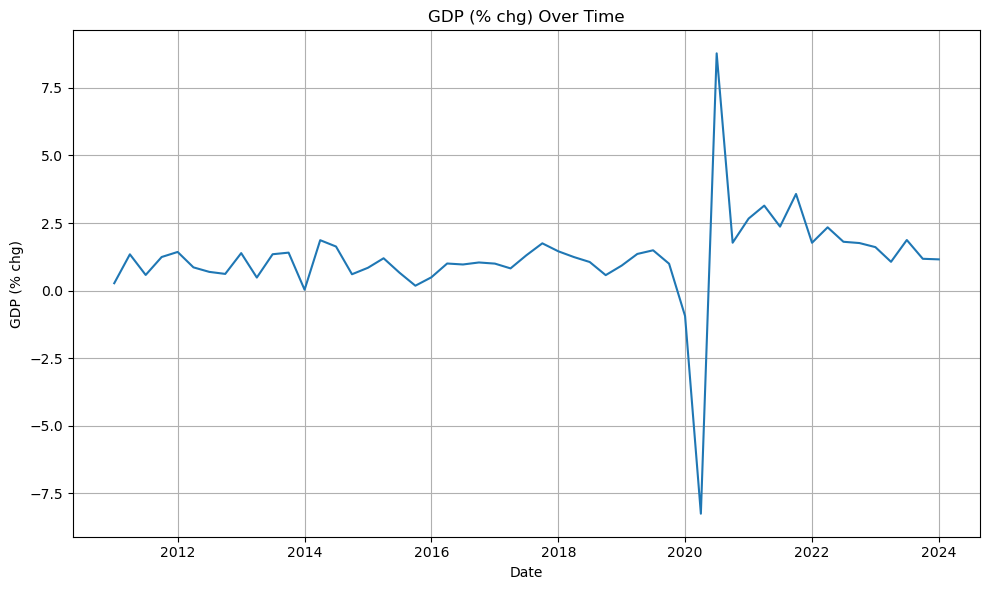

In [41]:
# Plot 1: U.S. GDP Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['Date'], cleaned_df['GDP (% chg)'], label='GDP (% chg)')
plt.title('GDP (% chg) Over Time')
plt.xlabel('Date')
plt.ylabel('GDP (% chg)')
plt.grid()
plt.tight_layout()
plt.show()


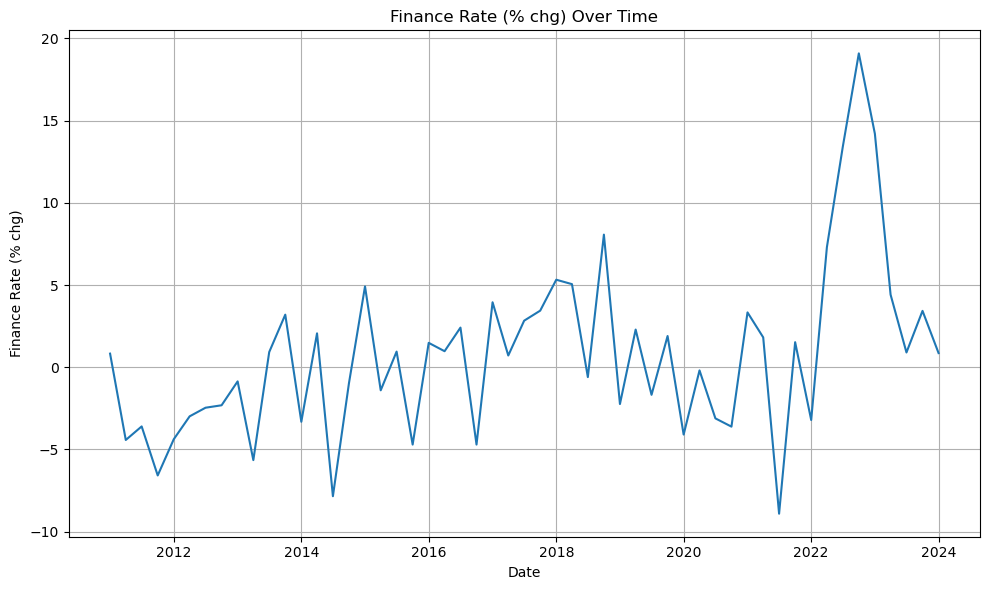

In [42]:
# Plot 2: Finance Rate Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['Date'], cleaned_df['Finance Rate (% chg)'], label='Finance Rate (% chg)')
plt.title('Finance Rate (% chg) Over Time')
plt.xlabel('Date')
plt.ylabel('Finance Rate (% chg)')
plt.grid()
plt.tight_layout()
plt.show()


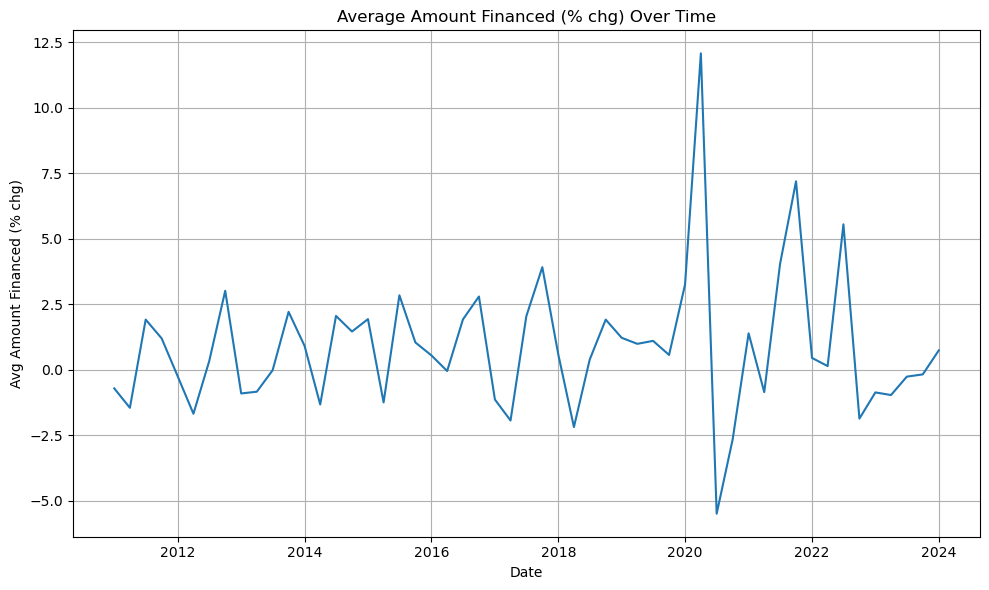

In [43]:
# Plot 3: Average Loan Amount Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['Date'], cleaned_df['Avg Amount Financed (% chg)'], label='Avg Amount Financed (% chg)')
plt.title('Average Amount Financed (% chg) Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Amount Financed (% chg)')
plt.grid()
plt.tight_layout()
plt.show()


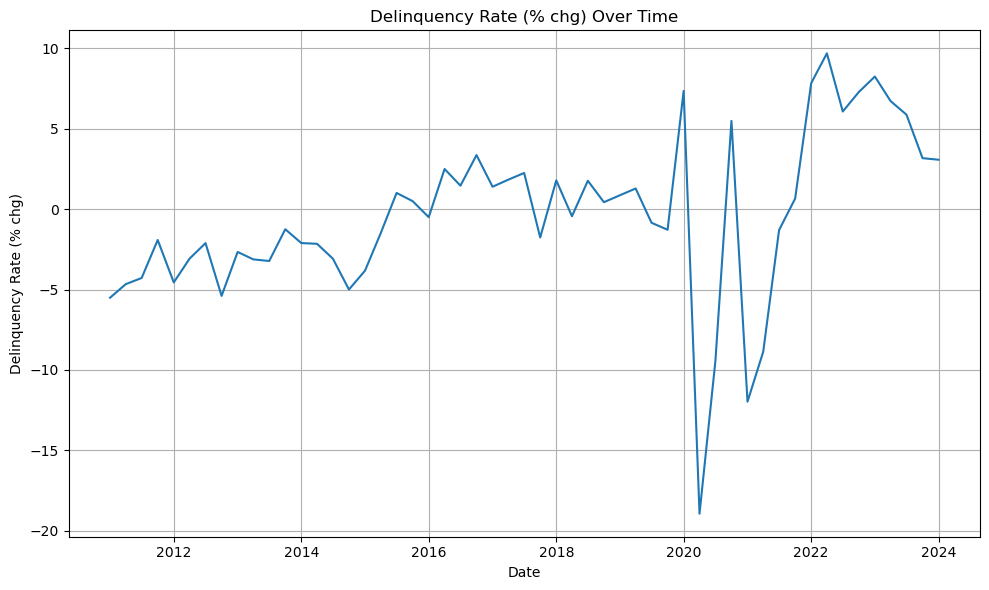

In [44]:
# Plot 4: Delinquency Rate Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['Date'], cleaned_df['Delinquency Rate (% chg)'], label='Delinquency Rate (% chg)')
plt.title('Delinquency Rate (% chg) Over Time')
plt.xlabel('Date')
plt.ylabel('Delinquency Rate (% chg)')
plt.grid()
plt.tight_layout()
plt.show()


R-value between GDP and Delinquency Rate: 0.20, P-value: 0.14383520198078084


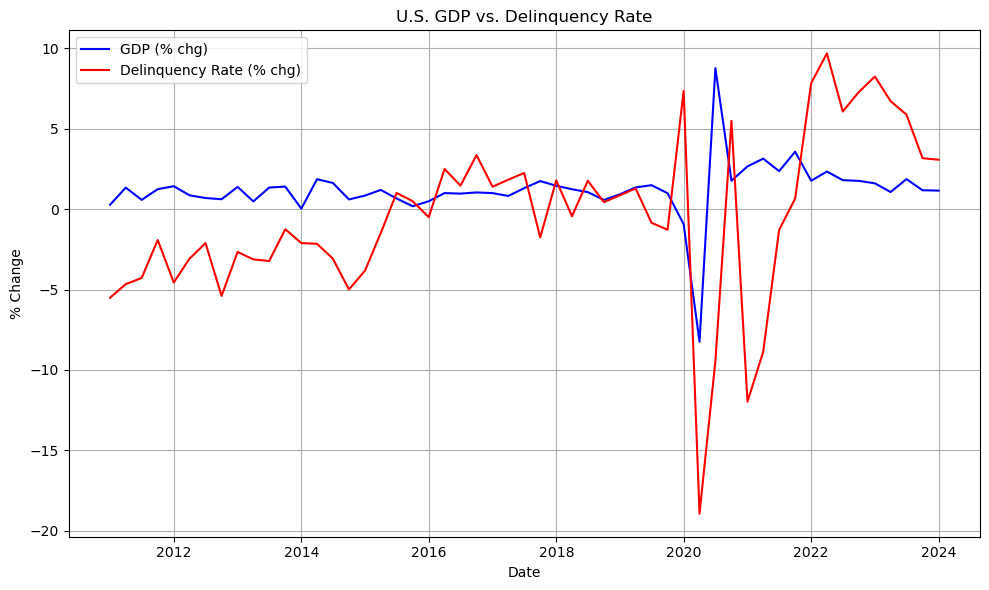

In [37]:
# Plot 5: GDP vs. Delinquency Rate
r_gdp_delinquency, p_gdp_delinquency = pearsonr(auto_df['GDP (% chg)'], auto_df['Delinquency Rate (% chg)'])
print(f"R-value between GDP and Delinquency Rate: {r_gdp_delinquency:.2f}, P-value: {p_gdp_delinquency}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['GDP (% chg)'], label='GDP (% chg)', color='blue')
plt.plot(auto_df['Date'], auto_df['Delinquency Rate (% chg)'], label='Delinquency Rate (% chg)', color='red')
plt.title('U.S. GDP vs. Delinquency Rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


R-value between GDP and Avg Amount Financed: -0.58, P-value: 6.218982512697506e-06


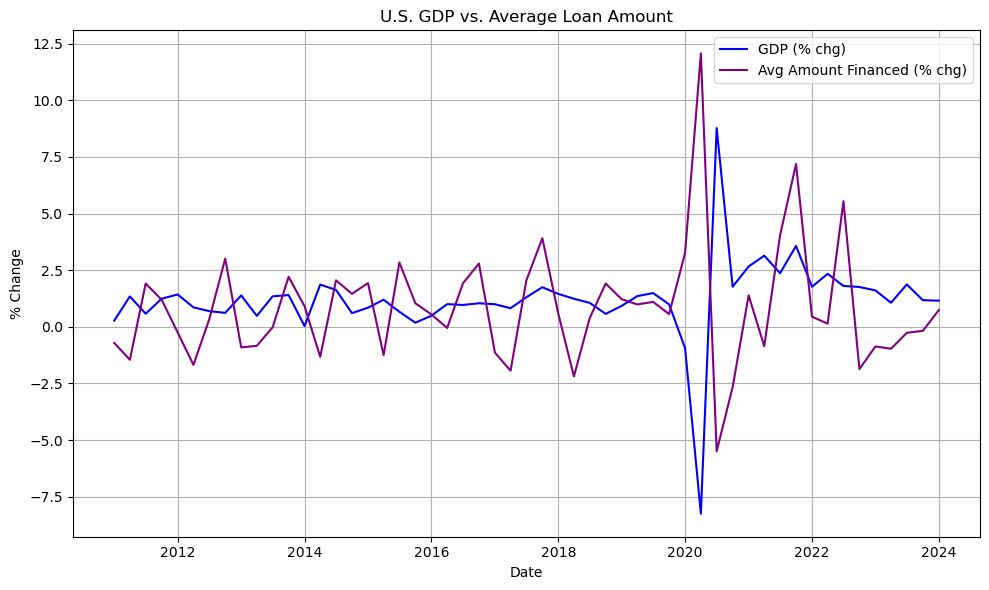

In [38]:
# Plot 6: GDP vs. Avg Amount Financed
r_gdp_loan, p_gdp_loan = pearsonr(auto_df['GDP (% chg)'], auto_df['Avg Amount Financed (% chg)'])
print(f"R-value between GDP and Avg Amount Financed: {r_gdp_loan:.2f}, P-value: {p_gdp_loan}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['GDP (% chg)'], label='GDP (% chg)', color='blue')
plt.plot(auto_df['Date'], auto_df['Avg Amount Financed (% chg)'], label='Avg Amount Financed (% chg)', color='purple')
plt.title('U.S. GDP vs. Average Loan Amount')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


R-value between Finance Rate and Avg Amount Financed: -0.03, P-value: 0.8297584015240713


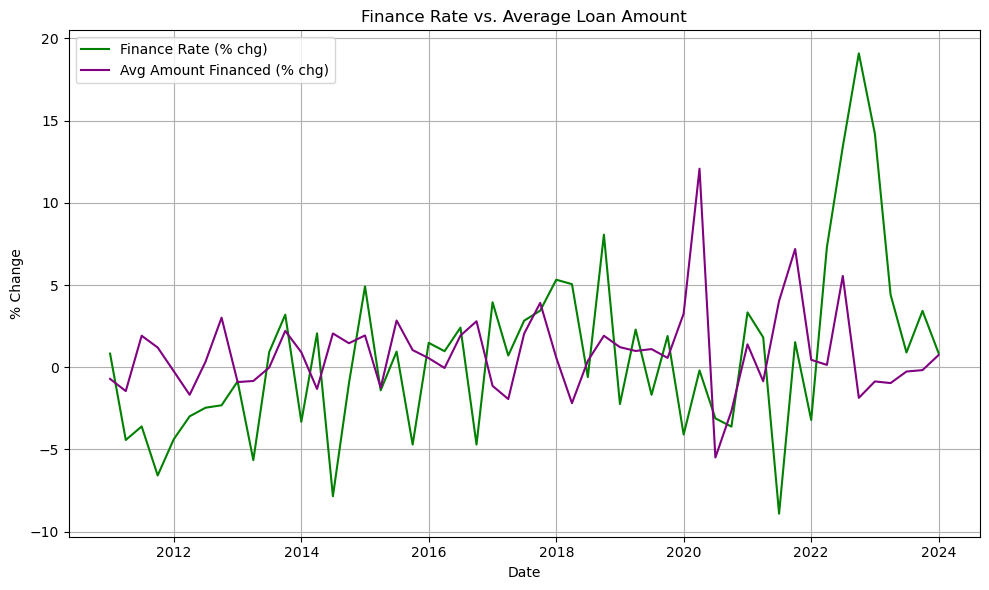

In [39]:
# Plot 7: Finance Rate vs. Average Loan Amount
r_finance_loan, p_finance_loan = pearsonr(auto_df['Finance Rate (% chg)'], auto_df['Avg Amount Financed (% chg)'])
print(f"R-value between Finance Rate and Avg Amount Financed: {r_finance_loan:.2f}, P-value: {p_finance_loan}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['Finance Rate (% chg)'], label='Finance Rate (% chg)', color='green')
plt.plot(auto_df['Date'], auto_df['Avg Amount Financed (% chg)'], label='Avg Amount Financed (% chg)', color='purple')
plt.title('Finance Rate vs. Average Loan Amount')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


R-value between Finance Rate and Delinquency Rate: 0.36, P-value: 0.008917635687704735


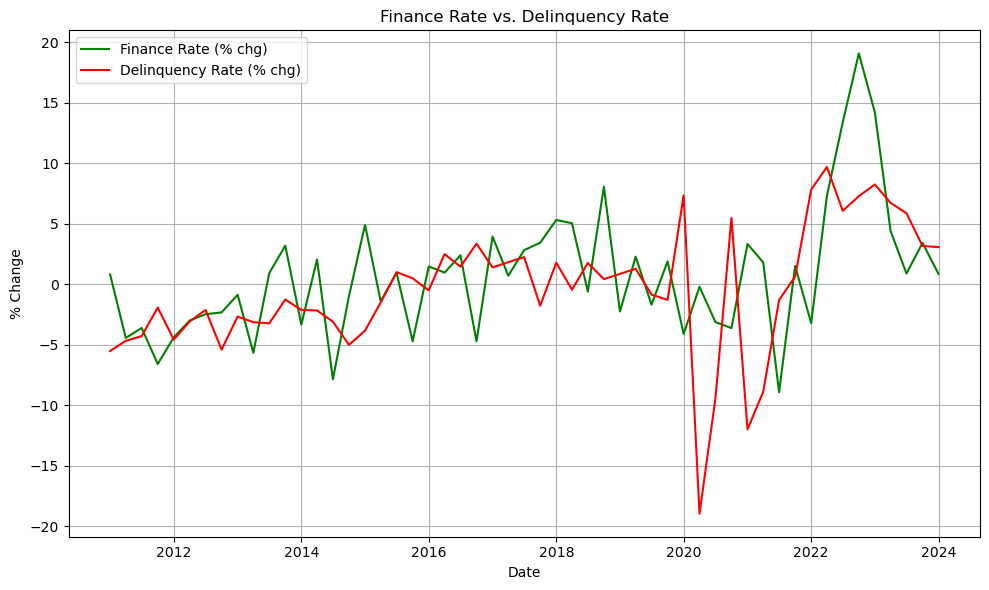

In [40]:
# Plot 8: Finance Rate vs Delinquency rate
r_finance_delinquency, p_finance_delinquency = pearsonr(auto_df['Finance Rate (% chg)'], auto_df['Delinquency Rate (% chg)'])
print(f"R-value between Finance Rate and Delinquency Rate: {r_finance_delinquency:.2f}, P-value: {p_finance_delinquency}")

plt.figure(figsize=(10, 6))
plt.plot(auto_df['Date'], auto_df['Finance Rate (% chg)'], label='Finance Rate (% chg)', color='green')
plt.plot(auto_df['Date'], auto_df['Delinquency Rate (% chg)'], label='Delinquency Rate (% chg)', color='red')
plt.title('Finance Rate vs. Delinquency Rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
